# In this notebook, we are going to learn three widely used clustering models.

<font color='red'>Question:</font> What are supervised learning and unsupervised learning?

In [ ]:
# Supervised learning is the learning applied on labeled data sets. Unsupervised learning applies on unlabeled data set.

<font color='red'>Question:</font> Why unsupervised learning is important?

In [ ]:
# Because it helps to discover hidden pattern of data without the need of human intervention.  

# 1. *k*-Means

## 1.1 Modeling

<font color='red'>Assignment:</font> Load the data in '../data/clustering.csv' into a DataFrame **df**, and plot the data in **df**.

In [1]:
import pandas as pd

df = pd.read_csv('../data/clustering.csv')

In [2]:
df.head()

,x1,x2
0,3.101246,6.183914
1,1.083915,12.311124
2,-4.100572,50.639475
3,-3.350454,104.422200
4,-4.256006,52.260368


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      404 non-null    float64
 1   x2      404 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


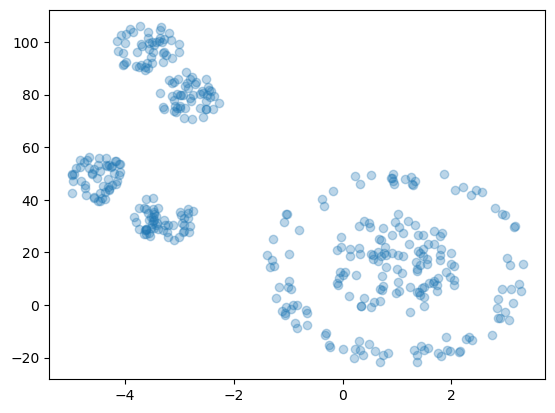

In [4]:
import matplotlib.pylab as plt
%matplotlib inline

plt.scatter(df['x1'], df['x2'], alpha=0.3)

<font color='red'>Question:</font> How many clusters do you think there are?

In [ ]:
# Six

<font color='red'>Assignment:</font> Train a **KMeans** model with the data in **df**. Set **n_cluster** the number of clusters which you think is reasonable.

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=6, random_state=0)

<font color='red'>Question:</font> What information does the attribute **label_** of **KMeans** provide?

In [ ]:
# The labels_ indicates the labels of each data point

<font color='red'>Assignment:</font> Visualize the clustering results. **Hint:** use **plt.scatter(x, y, c=z)**.

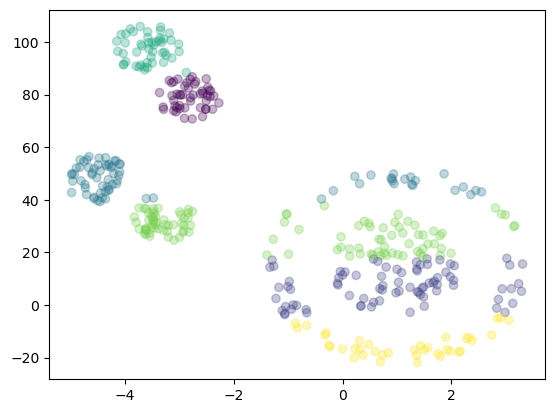

In [7]:
plt.scatter(df['x1'], df['x2'], c=kmeans.labels_, alpha=0.3)

<font color='red'>Question:</font> Do you think the result is reasonable? What is the reason? How can you solve it? **Hint:** Re-plot the clustering results with **plt.axis('equal')**.

(-5.397438252729568,
 3.7217075241479174,
 -28.269319689435598,
 112.25222492450114)

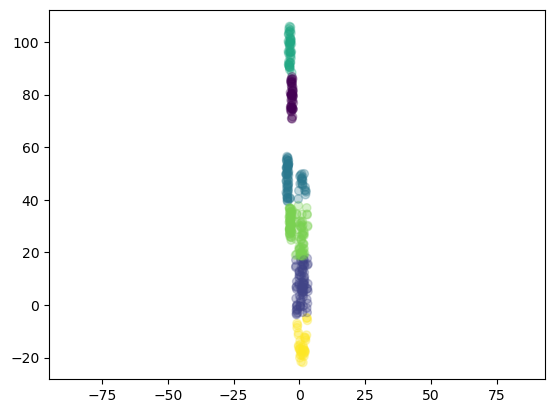

In [8]:
plt.scatter(df['x1'], df['x2'], c=kmeans.labels_, alpha=0.3)
plt.axis('equal')

In [ ]:
# The result looks unresonable in the origin plot. It becomes resonalble after plot with rescale.
# The problem is that the original data set the range of x1 and x2 are very different.

<font color='red'>Assignment:</font> Rescale the data in **df** and assign them to a variable X. Re-do the above steps with X.

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

steps = [('rescale', MinMaxScaler()),
             ('km', KMeans(n_clusters=6, random_state=0))]
model = Pipeline(steps)

model.fit(df)

Pipeline(steps=[('rescale', MinMaxScaler()),
                ('km', KMeans(n_clusters=6, random_state=0))])

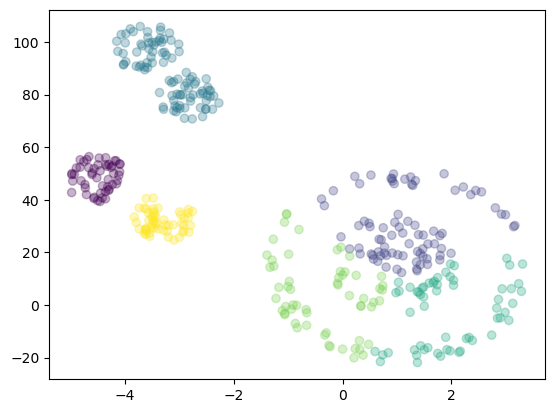

In [16]:
plt.scatter(df['x1'], df['x2'], c=model[1].labels_, alpha=0.3)

<font color='red'>Question:</font> Do you think it is more reasonable now? Can you describe how **KMeans** works? How **centroids** are initialized and updated? How does the model determine which cluster a data point belongs to?

In [ ]:
# It is more resonable then the previous version. But it seems that KMeans applies on the Euclidean struction of the data set.

# Kmeans partition the observations into several clusters in which each observation belong to the cluster with the nearest 
# distance to the cluster centroid.

# While the number of cluster is set, the centroids could be initialized by sampling based on an empirical probability
# distribution of the points’ contribution to the overall inertia.
# The centroids are updated as the average of all the assigned data points of the cluster
# The updates of the clustering and the updates of centroids repeasted until all the centroids stablize or the maximal
# repeatition number is met.

<font color='red'>Question:</font> What are the important hyperparameters for **KMeans**? How do they affect results?

In [ ]:
# Important hyperparameters:
# General:
# 1. n_clusters: determine the number of clusters
# Important if the dimemsion of the data is high
# 2. init: determine the mothod of how centroids are initialized
# 3. n_init: how many times of kMeans is ran, if 'init' = 'random'
# 4. max_iter: number of max iteratrio each kmeans is run
# 5. tol: determine when the centroids stablize

## 1.2 Elbow Method

<font color='red'>Question:</font> What information does attribute **inertia_** of **KMeans** provide?

In [ ]:
# inertia_ provides the sum of squared distance of the samples to their cluster centroid.

In [17]:
model[1].inertia_

4.584228463907308

<font color='red'>Assignment:</font> Plot **inertia_** value versus **n_clusters**.

C:\Users\liyuh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


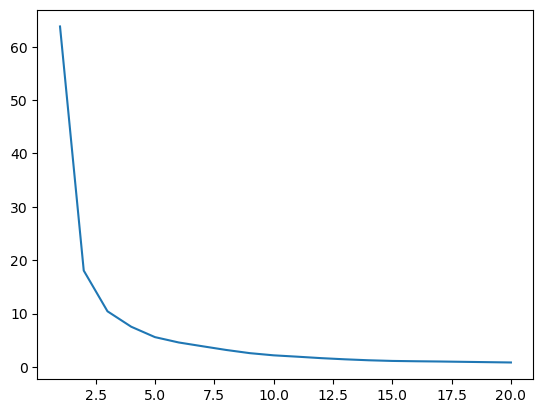

In [18]:
inertia_list = [0] * 20

for i in range(1,21):
    steps = [('rescale', MinMaxScaler()),
             ('km', KMeans(n_clusters=i, random_state=0))]
    model = Pipeline(steps)
    model.fit(df)
    inertia_list[i-1] = model[1].inertia_
    
plt.plot(range(1,21), inertia_list)

In [22]:
[inertia_list[i+1]- inertia_list[i] for i in range(19)]

[-45.738358130984395,
 -7.627722981072035,
 -2.890490985558129,
 -1.9474688911334583,
 -1.0013735824918193,
 -0.7076323600697902,
 -0.6953700458340752,
 -0.6004790524802699,
 -0.40644226960861696,
 -0.2549668903613025,
 -0.2709240086437732,
 -0.21960519322097172,
 -0.1802250566486372,
 -0.12355894931945266,
 -0.0611068744670582,
 -0.04699292511940811,
 -0.06156731496239576,
 -0.0600636317836124,
 -0.06077351781031892]

<font color='red'>Question:</font> How many clusters (or which **k**) should we choose here? Is it consistent with what you found in the figure?

In [ ]:
# should choose 6. Basically matched. 

<font color='red'>Question:</font> What is **Elbow Method**? Does it always work?

In [ ]:
# “elbow” is the point after which the distortion/inertia start decreasing in a linear fashion. The k should be chosen as 
# the elbow point

# Sometimes there is no elbow point in the k-inertia curve.
# The Silhouette score is a good alternative: 
# https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d


# 2. Hierarchical Clustering

## 2.1 Modeling

<font color='red'>Assignment:</font> Train an **AgglomerativeClustering** model with **X**.

In [23]:
from sklearn.cluster import AgglomerativeClustering

steps = [('rescale', MinMaxScaler()),
             ('ac', AgglomerativeClustering())]
model = Pipeline(steps)

model.fit(df)

Pipeline(steps=[('rescale', MinMaxScaler()), ('ac', AgglomerativeClustering())])

<font color='red'>Assignment:</font> Visualize the clustering results.

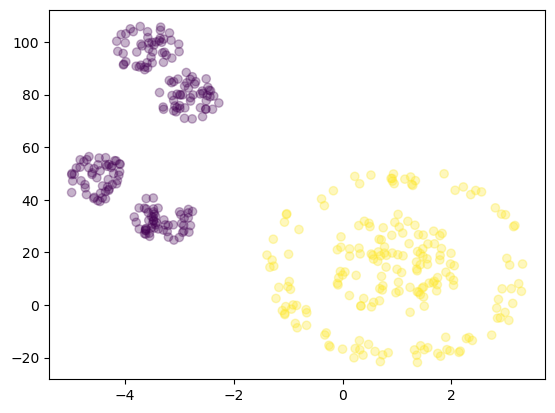

In [24]:
plt.scatter(df['x1'], df['x2'], c=model[1].labels_, alpha=0.3)

<font color='red'>Question:</font> How does hierarchecial clustering work?

In [ ]:
# Hierarchecial clustering works as initialize each data point as a cluster then progressively merge the two closest cluster 
# until the total cluster number decreased to the set goal cluster number.

<font color='red'>Question:</font> What are the important hyperparameters for **AgglomerativeClustering**? How do they affect results?

In [ ]:
# n_clusters: the number of final clusters.
# metric: metric used to compute the linkage of two clusters
# linkage: the linkage criterior to use
# 

## 2.2 Dendrogram

**Example:** Plot dendrogram of hierarchical clustering results. Here we use **linkage** in **scipy** to reproduce the results of **AgglomerativeClustering** model.

Text(0, 0.5, 'distance')

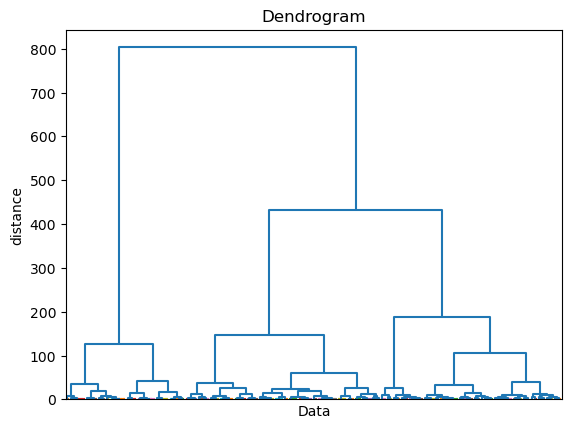

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(df, 'ward')
dendrogram(linkage_matrix, color_threshold=2.0)
plt.title('Dendrogram')
plt.xlabel('Data')
plt.xticks([])
plt.ylabel('distance')

# 3. DBSCAN

<font color='red'>Assignment:</font> Train a **DBSCAN** model with **X**.

In [27]:
from sklearn.cluster import DBSCAN

steps = [('rescale', MinMaxScaler()),
             ('dbscan', DBSCAN(eps=3, min_samples=2))]
model = Pipeline(steps)

model.fit(df)

Pipeline(steps=[('rescale', MinMaxScaler()),
                ('dbscan', DBSCAN(eps=3, min_samples=2))])

<font color='red'>Assignment:</font> Visualize the clustering results.

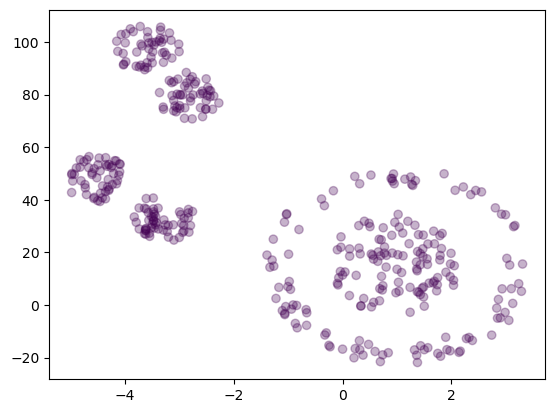

In [28]:
plt.scatter(df['x1'], df['x2'], c=model[1].labels_, alpha=0.3)

In [30]:
max(model[1].labels_)

0

<font color='red'>Assignment:</font> Tune hyperparameters to make the clustering results more reasonable.

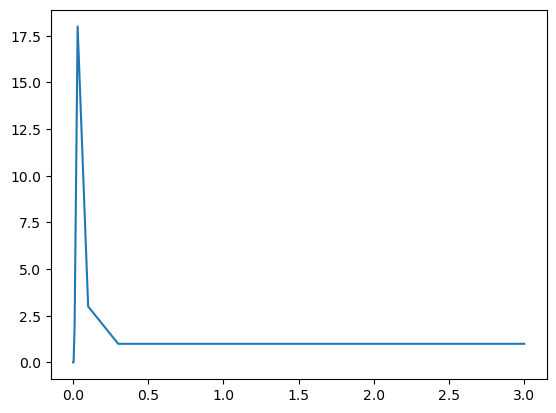

In [32]:
eps_list = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
n_cluster = [0] * len(eps_list)

for i in range(len(eps_list)):
    steps = [('rescale', MinMaxScaler()),
             ('dbscan', DBSCAN(eps=eps_list[i], min_samples=5))]
    model = Pipeline(steps)
    model.fit(df)
    n_cluster[i] = max(model[1].labels_)+1

plt.plot(eps_list, n_cluster)

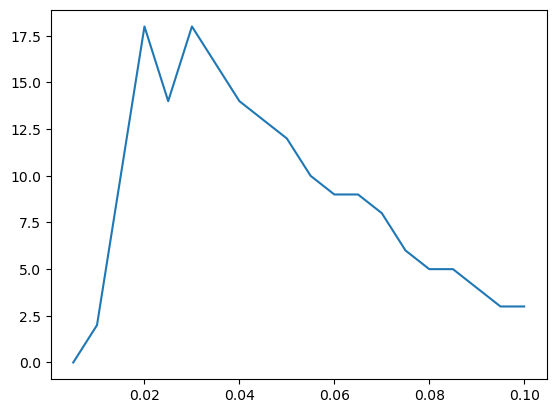

In [33]:
eps_list = [i*0.005 for i in range(1,21)]
n_cluster = [0] * len(eps_list)

for i in range(len(eps_list)):
    steps = [('rescale', MinMaxScaler()),
             ('dbscan', DBSCAN(eps=eps_list[i], min_samples=5))]
    model = Pipeline(steps)
    model.fit(df)
    n_cluster[i] = max(model[1].labels_)+1

plt.plot(eps_list, n_cluster)

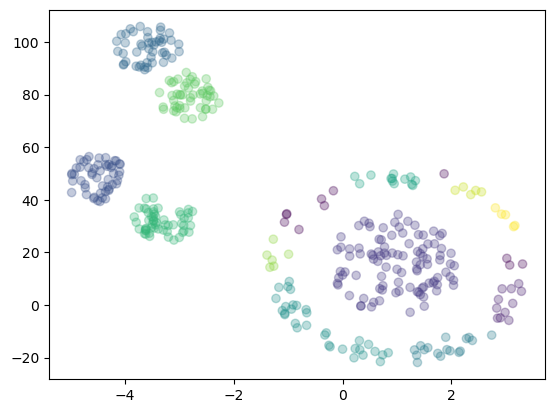

In [43]:
steps = [('rescale', MinMaxScaler()),
             ('dbscan', DBSCAN(eps=0.05, min_samples=5))]
model = Pipeline(steps)

model.fit(df)
plt.scatter(df['x1'], df['x2'], c=model[1].labels_, alpha=0.3)

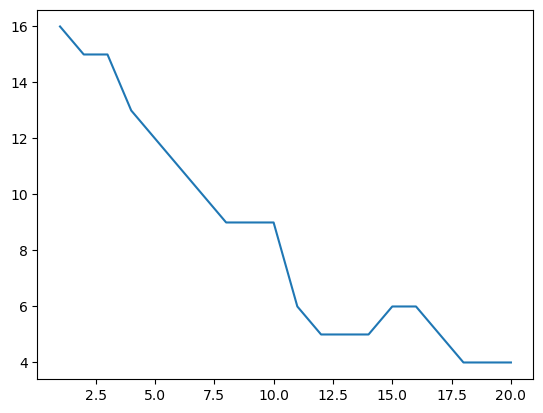

In [45]:
min_samples_list = range(1,21)
n_cluster = [0] * len(min_samples_list)

for i in range(len(min_samples_list)):
    steps = [('rescale', MinMaxScaler()),
             ('dbscan', DBSCAN(eps=0.05, min_samples=min_samples_list[i]))]
    model = Pipeline(steps)
    model.fit(df)
    n_cluster[i] = max(model[1].labels_)+1

plt.plot(range(1,21), n_cluster)

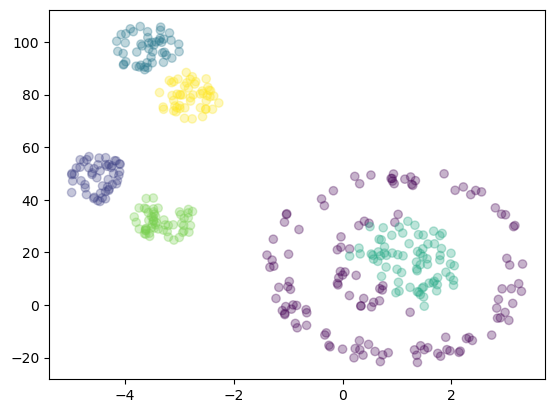

In [49]:
steps = [('rescale', MinMaxScaler()),
             ('dbscan', DBSCAN(eps=0.05, min_samples=12))]
model = Pipeline(steps)

model.fit(df)
plt.scatter(df['x1'], df['x2'], c=model[1].labels_, alpha=0.3)

<font color='red'>Question:</font> How does **DBSCAN** work?

In [ ]:
# DBSCAN stands for density-based spatial clustering of applications with noise.
# It is able to find cluster of arbitory shape or cluster with outliers.
# The main idea behind DBSCAN is that a point belong to a cluster if it is close to many points of that cluster.
# 

<font color='red'>Question:</font> What are the important hyperparameters for **DBSCAN**? How do they affect results?

In [ ]:
# eps: Two points are called neighbours if their distance is less than eps
# min_samples: minimal data points to define a core-point/cluster.

<font color='red'>Question:</font> Do we need to set the number of clusters in **DBSCAN**? Why or why not?

In [ ]:
# no, the number of cluster is determined for a data set struction if eps and min_samples are set.